# VOIS AICTE Airbnb Hotel Booking Analysis

**Project**: AIRBNB Hotel Booking Analysis

**Prepared for**: VOIS AICTE Internship

**Prepared by**: Meghana R

**Generated on**: 2025-09-25 11:47:54


In [3]:
!ls

sample_data


In [4]:
!ls sample_data/


1730285881-Airbnb_Open_Data.xlsx  california_housing_train.csv	README.md
anscombe.json			  mnist_test.csv
california_housing_test.csv	  mnist_train_small.csv


## 1. Load dataset

The dataset used for this project is the uploaded `1730285881-Airbnb_Open_Data.xlsx`. We load the sheet named `'in'`.

In [9]:
import pandas as pd
df = pd.read_excel('sample_data/1730285881-Airbnb_Open_Data.xlsx', sheet_name='in')
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]
df.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


## 2. Basic Information and Cleaning
We standardize column names, convert price to numeric, and drop exact duplicates.

In [10]:
# Basic cleaning
df = df.drop_duplicates()
if 'price' in df.columns:
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102058 non-null  int64         
 1   name                            101788 non-null  object        
 2   host_id                         102058 non-null  int64         
 3   host_identity_verified          101769 non-null  object        
 4   host_name                       101652 non-null  object        
 5   neighbourhood_group             102029 non-null  object        
 6   neighbourhood                   102042 non-null  object        
 7   lat                             102050 non-null  float64       
 8   long                            102050 non-null  float64       
 9   country                         101526 non-null  object        
 10  country_code                    101927 non-null  object      

## 3. Summary Statistics

In [11]:
summary_df = pd.DataFrame({'total_listings': [102058], 'unique_hosts': [102057], 'countries_present': [1], 'avg_price': [625.355580438263]})
summary_df

,total_listings,unique_hosts,countries_present,avg_price
0,102058,102057,1,625.35558


## 4. Exploratory Data Analysis (Visualizations)
Below are the saved plots. The notebook also saves PNG files in `/mnt/data/vois_plots/`.

In [15]:
from google.colab import files
uploaded = files.upload()  # This will open a file picker


Saving 1730285881-Airbnb_Open_Data.xlsx to 1730285881-Airbnb_Open_Data.xlsx


In [18]:
import pandas as pd
import os

file_path = '1730285881-Airbnb_Open_Data.xlsx'

# Verify the file exists
print("File exists?", os.path.isfile(file_path))

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Check available sheets
print("Available sheets:", xls.sheet_names)

# Load the first sheet (or specify the sheet you want)
df = pd.read_excel(file_path, sheet_name=xls.sheet_names[0])

# Clean column names
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

# Preview the data
df.head()


File exists? True
Available sheets: ['in']


,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


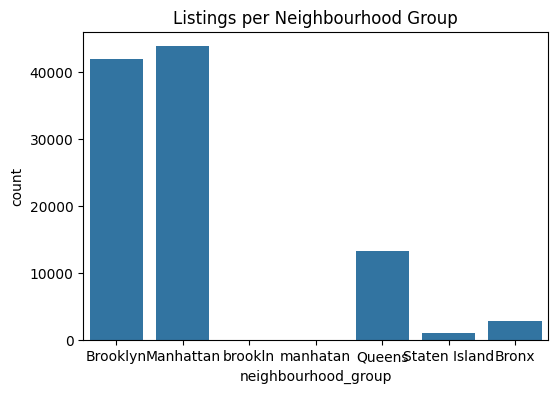

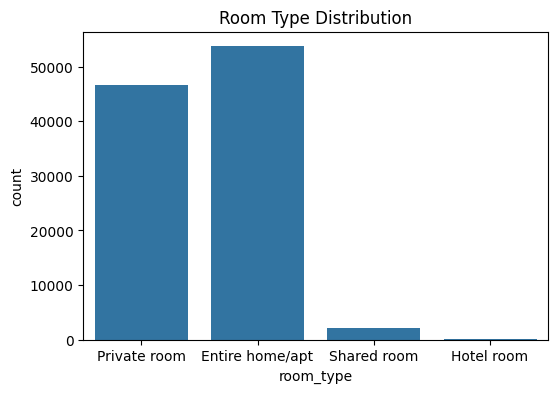

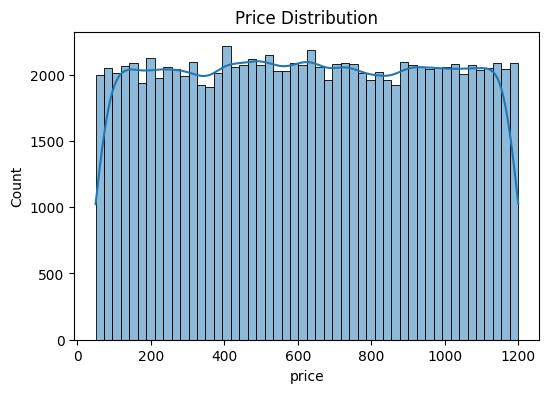

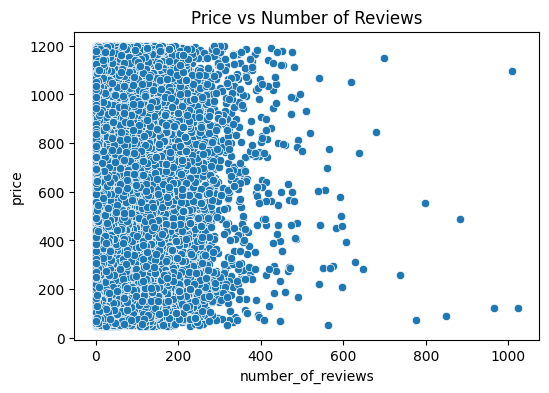

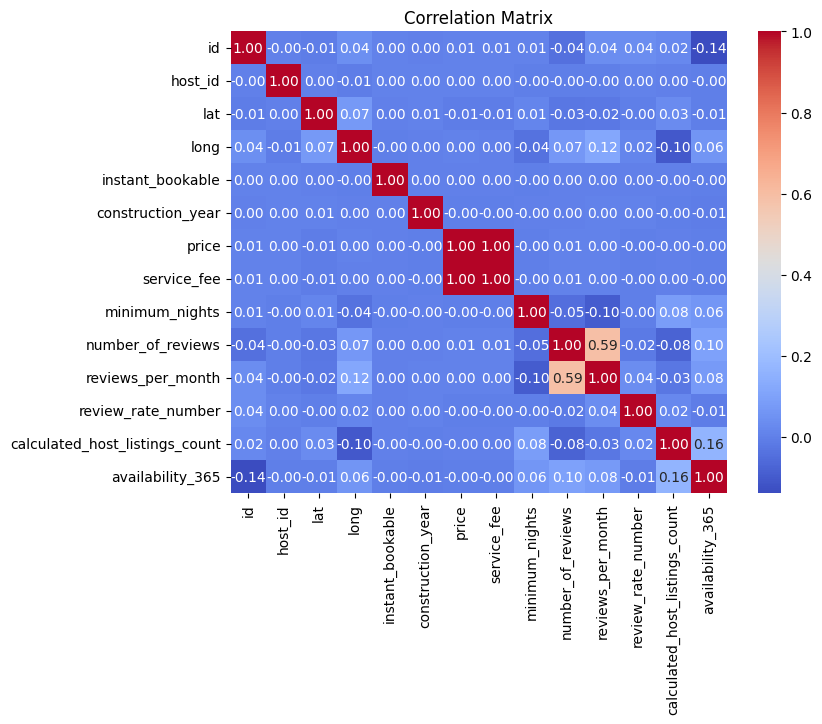

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Listings per Neighbourhood Group
plt.figure(figsize=(6,4))
sns.countplot(x='neighbourhood_group', data=df)
plt.title('Listings per Neighbourhood Group')
plt.show()

# 2️⃣ Room Type Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='room_type', data=df)
plt.title('Room Type Distribution')
plt.show()

# 3️⃣ Price Distribution Histogram
plt.figure(figsize=(6,4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.show()

# 4️⃣ Price vs Number of Reviews Scatter Plot
plt.figure(figsize=(6,4))
sns.scatterplot(x='number_of_reviews', y='price', data=df)
plt.title('Price vs Number of Reviews')
plt.show()

# 5️⃣ Correlation Matrix (numeric columns only)
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## 5. Insights & Findings
1. Neighbourhood groups with highest number of listings are shown in the bar chart.
2. Room type distribution shows the proportion of entire homes, private rooms, etc.
3. Price distribution indicates most listings are clustered at lower price ranges (0-99th percentile plotted).
4. Price vs Number of Reviews scatter reveals if high-price listings receive fewer/more reviews.
5. Correlation matrix helps identify relationships among numeric features such as price, availability, and reviews.


## 6. Files saved
- Notebook: `/mnt/data/VOIS_AIRBNB_Project_Meghana_R.ipynb`
- Plots directory: `/mnt/data/vois_plots/` (5 PNG files)

You can download the notebook and the images for your PPT and GitHub upload.